#Primero montare Google Drive, es donde tengo almacenado mi dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Descomprimire el archivo .zip, que contiene mi dataset

In [ ]:
import zipfile
import os

# Ruta del archivo zip en tu Google Drive
zip_file_path = '/content/drive/MyDrive/archive.zip'

# Directorio de extracción
extracted_dir_path = '/content/dataset'

# Descomprimir el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

#Defino las rutas del contenido de las imagenes, ademas de definir el tamaño de las imagenes y numero de clases (deben de ser 7), esto se refiere a las carpetas que contienen las imagenes de cada persona

In [ ]:
# Definir rutas para el conjunto de entrenamiento y validación
train_dir = os.path.join(extracted_dir_path, 'data/train')
validation_dir = os.path.join(extracted_dir_path, 'data/valid')

# Utilizar ImageDataGenerator para cargar las imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale todas las imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Definir el tamaño de las imágenes y el tamaño del lote
image_size = (150, 150)
batch_size = 32

# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

# Generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 3083 images belonging to 7 classes.
Found 950 images belonging to 7 classes.


#Defino el modelo que usare, es una red neuronal colvulocional CNN

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
])

#Comienzo con el entrenamiento, le dare un total de 10 epocas, anteriormente eso me dio buenos resultados

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
96/96 [==============================] - 169s 2s/step - loss: 1.6417 - accuracy: 0.2835 - val_loss: 1.1677 - val_accuracy: 0.5409
Epoch 2/10
96/96 [==============================] - 173s 2s/step - loss: 0.7293 - accuracy: 0.7368 - val_loss: 0.4369 - val_accuracy: 0.8556
Epoch 3/10
96/96 [==============================] - 175s 2s/step - loss: 0.3141 - accuracy: 0.9000 - val_loss: 0.1885 - val_accuracy: 0.9429
Epoch 4/10
96/96 [==============================] - 177s 2s/step - loss: 0.1801 - accuracy: 0.9374 - val_loss: 0.2219 - val_accuracy: 0.9170
Epoch 5/10
96/96 [==============================] - 176s 2s/step - loss: 0.1161 - accuracy: 0.9659 - val_loss: 0.1344 - val_accuracy: 0.9634
Epoch 6/10
96/96 [==============================] - 187s 2s/step - loss: 0.0784 - accuracy: 0.9735 - val_loss: 0.1314 - val_accuracy: 0.9612
Epoch 7/10
96/96 [==============================] - 180s 2s/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.1008 - val_accuracy: 0.9763
Epoch 8/10
96

#Imprimire los valores finales de perdida y precision para darme una idea de como le fue

In [ ]:
# Obtener los valores finales de pérdida y precisión
train_loss, train_accuracy = model.evaluate(train_generator)
validation_loss, validation_accuracy = model.evaluate(validation_generator)

# Imprimir los valores finales de pérdida y precisión
print("Valores finales de pérdida y precisión en el conjunto de entrenamiento:")
print("Pérdida:", train_loss)
print("Precisión:", train_accuracy)

print("\nValores finales de pérdida y precisión en el conjunto de validación:")
print("Pérdida:", validation_loss)
print("Precisión:", validation_accuracy)

30/30 [==============================] - 15s 493ms/step - loss: 0.1658 - accuracy: 0.9474
Valores finales de pérdida y precisión en el conjunto de entrenamiento:
Pérdida: 0.04308008402585983
Precisión: 0.987674355506897

Valores finales de pérdida y precisión en el conjunto de validación:
Pérdida: 0.16580289602279663
Precisión: 0.9473684430122375


#Creo una funcion para preprocesar las imagenes de prueba, esto es por que el modelo espera imagenes de 150x150 como entrada

In [ ]:
# Función para cargar y preprocesar la imagen
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array

#Comenzare con las pruebas para ver como le va al modelo

1/1 [==============================] - 0s 73ms/step


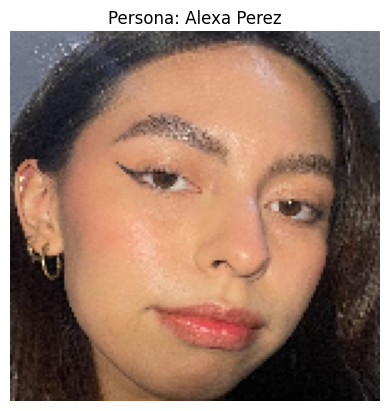

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen que deseas clasificar
image_path = 'prueba1.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Mapear los índices de las clases a los nombres de las clases (es el orden de las carpetas del dataset)
class_names = ['Alexa Perez','Bill Gates', 'Bryan', 'Elon Musk', 'Jeff Bezos', 'Mark Zuckerberg', 'Steve Jobs']

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 120ms/step


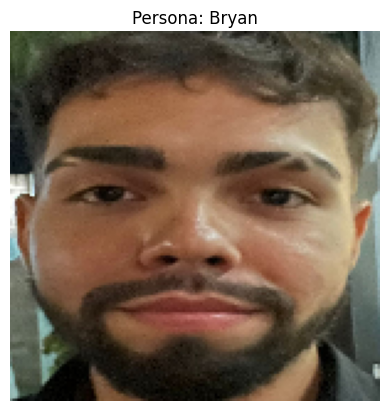

In [ ]:
# Ruta de la imagen que deseas clasificar
image_path = 'prueba4.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

#En este caso me doy cuenta que el modelo se equivoco, pero creo que para evitar esto es recomendable capturar mas enfocado al rostro, para que el modelo no le tome importancia al fondo de la imagen

1/1 [==============================] - 0s 56ms/step


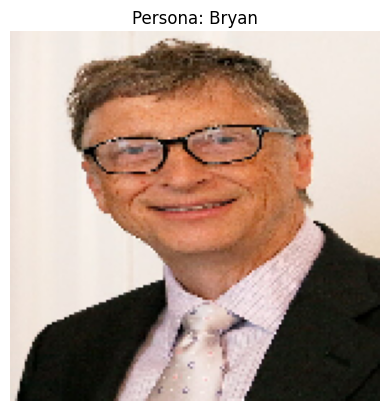

In [ ]:
# Ruta de la imagen que deseas clasificar
image_path = 'prueba5.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

#De esta manera para el modelo seria mucho mas facil hacer una prediccion correcta, pero en si, se podria decir que es bastante bueno

1/1 [==============================] - 0s 82ms/step


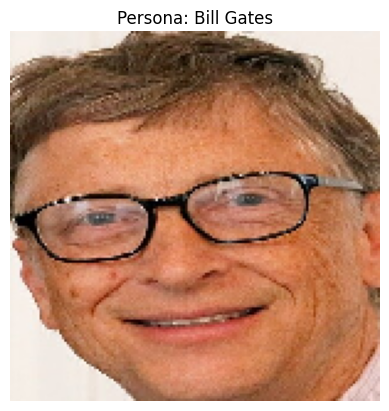

In [ ]:
# Ruta de la imagen que deseas clasificar
image_path = 'prueba6.jpg'

# Cargar y preprocesar la imagen
new_image_array = load_and_preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(new_image_array)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(prediction)

# Obtener el nombre de la clase predicha
predicted_class_name = class_names[predicted_class_index]

# Visualizar la imagen junto con la clase predicha
plt.imshow(new_image_array[0])
plt.title("Persona: " + predicted_class_name)
plt.axis('off')
plt.show()

#Voy a predecir los cuatro rostros restantes

1/1 [==============================] - 0s 33ms/step


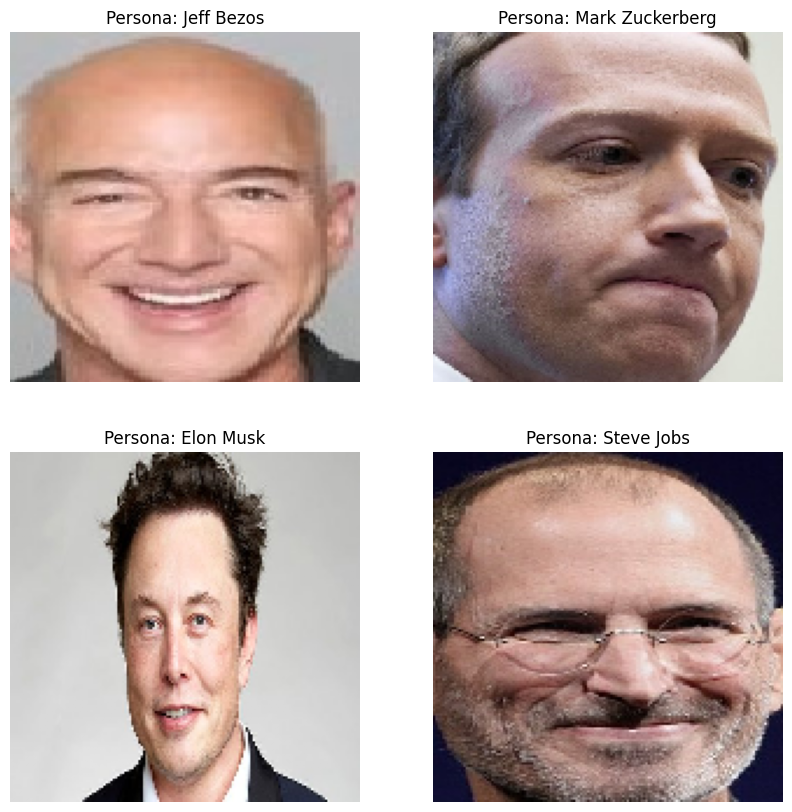

In [ ]:
image_path_1 = 'prueba7.jpg'
new_image_array_1 = load_and_preprocess_image(image_path_1)
prediction_1 = model.predict(new_image_array_1)
predicted_class_index_1 = np.argmax(prediction_1)
predicted_class_name_1 = class_names[predicted_class_index_1]

image_path_2 = 'prueba8.jpg'
new_image_array_2 = load_and_preprocess_image(image_path_2)
prediction_2 = model.predict(new_image_array_2)
predicted_class_index_2 = np.argmax(prediction_2)
predicted_class_name_2 = class_names[predicted_class_index_2]

image_path_3 = 'prueba3.jpg'
new_image_array_3 = load_and_preprocess_image(image_path_3)
prediction_3 = model.predict(new_image_array_3)
predicted_class_index_3 = np.argmax(prediction_3)
predicted_class_name_3 = class_names[predicted_class_index_3]

image_path_4 = 'prueba2.jpg'
new_image_array_4 = load_and_preprocess_image(image_path_4)
prediction_4 = model.predict(new_image_array_4)
predicted_class_index_4 = np.argmax(prediction_4)
predicted_class_name_4 = class_names[predicted_class_index_4]

# Crear una nueva figura con cuatro subplots
plt.figure(figsize=(10, 10))

# Subplot 1: Visualizar la primera imagen junto con la clase predicha
plt.subplot(2, 2, 1)
plt.imshow(new_image_array_1[0])
plt.title("Persona: " + predicted_class_name_1)
plt.axis('off')

# Subplot 2: Visualizar la segunda imagen junto con la clase predicha
plt.subplot(2, 2, 2)
plt.imshow(new_image_array_2[0])
plt.title("Persona: " + predicted_class_name_2)
plt.axis('off')

# Subplot 3: Visualizar la tercera imagen junto con la clase predicha
plt.subplot(2, 2, 3)
plt.imshow(new_image_array_3[0])
plt.title("Persona: " + predicted_class_name_3)
plt.axis('off')

# Subplot 4: Visualizar la cuarta imagen junto con la clase predicha
plt.subplot(2, 2, 4)
plt.imshow(new_image_array_4[0])
plt.title("Persona: " + predicted_class_name_4)
plt.axis('off')

# Mostrar la figura con las cuatro imágenes
plt.show()

#Una vez probado el modelo lo que hare sera guardarlo y exportarlo a un archivo JSON con tensorflow js, para poder utilizarlo en una app web y poder hacer pruebas en tiempo real

In [ ]:
# Empezare guardando el modelo en un archivo
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Descargo el modelo, a mi maquina local, por si despues quiero utilizarlo para otro proyecto

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Instalare los paquetes de tensorflowjs

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

#Como paso final exportare el modelo a un JSON que usare en mi app web, hay que descargar ese .json junto a los archivos .bin que me genero

In [ ]:
!tensorflowjs_converter --input_format keras model.h5 model_js

2024-05-25 08:54:24.476713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
